In [2]:
import pandas as pd
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
list_of_reports = glob.glob('/Users/jhoff/Desktop/esvelt_lab/quasts/cat_*.tsv')
report_DF = pd.DataFrame()

for report_path in list_of_reports:
    basename = os.path.basename(report_path)
    #coassembly = '_'.join(basename.split('_')[:2])
    coassembly = basename.split('_')[1]
    assembler = basename.split('_')[2]
    
    temp_DF = pd.read_csv(report_path,delimiter='\t')
    temp_DF[['coassembly','assembler']] = coassembly, assembler
    report_DF = pd.concat([report_DF,temp_DF])
report_DF['coassembly'] = report_DF.coassembly.astype('int32')
report_DF = report_DF.sort_values(['coassembly','assembler'])
report_DF = report_DF[report_DF.Assembly!='scaffolds_broken'].reset_index(drop=True) #what are scaffolds_broken?
report_DF #re-copy metaspades day 5

,Assembly,# contigs (>= 0 bp),# contigs (>= 1000 bp),# contigs (>= 2500 bp),Total length (>= 0 bp),Total length (>= 1000 bp),Total length (>= 2500 bp),# contigs,Largest contig,Total length,GC (%),N50,N90,auN,L50,L90,# N's per 100 kbp,coassembly,assembler
0,final.contigs,94491,8599,1358,59844228,19759503,9358529,34815,496706,37075433,52.79,1076,555,19894.6,7421,27761,0.00,0,megahit
1,scaffolds,184770,10609,1181,94076824,21571378,8313015,47373,433591,45980079,52.33,944,550,18667.5,12071,38586,1.52,0,metaspades
2,final.contigs,74670,6808,1064,47707708,16178752,7907033,27143,496706,29604781,53.69,1118,556,24148.9,5504,21515,0.00,1,megahit
3,scaffolds,148697,8273,913,75709456,17471767,7111938,37405,433591,36795430,53.10,953,550,22769.3,9223,30378,1.25,1,metaspades
4,final.contigs,48526,5007,706,32692110,12240625,6108493,18571,496706,21307619,53.13,1188,566,31893.2,3546,14555,0.00,2,megahit
5,scaffolds,100234,5827,564,51715059,12998526,5521337,24293,433591,25292630,52.50,1029,555,31963.4,5480,19484,1.54,2,metaspades
6,final.contigs,31287,2450,337,21105526,7675200,4740437,11168,496706,13462599,52.99,1206,563,48114.4,1588,8623,0.00,3,megahit
7,scaffolds,69773,3154,302,35353507,8612040,4631571,14807,433591,16311501,52.33,1063,553,48819.8,2712,11701,2.08,3,metaspades
8,final.contigs,10334,685,173,9060421,4741150,4016900,3157,496706,6352024,52.96,30991,602,102933.1,27,1993,0.00,4,megahit
9,scaffolds,27261,815,153,15060723,4858482,3940564,4665,433591,7357901,52.03,4471,570,91102.9,73,3282,0.54,4,metaspades


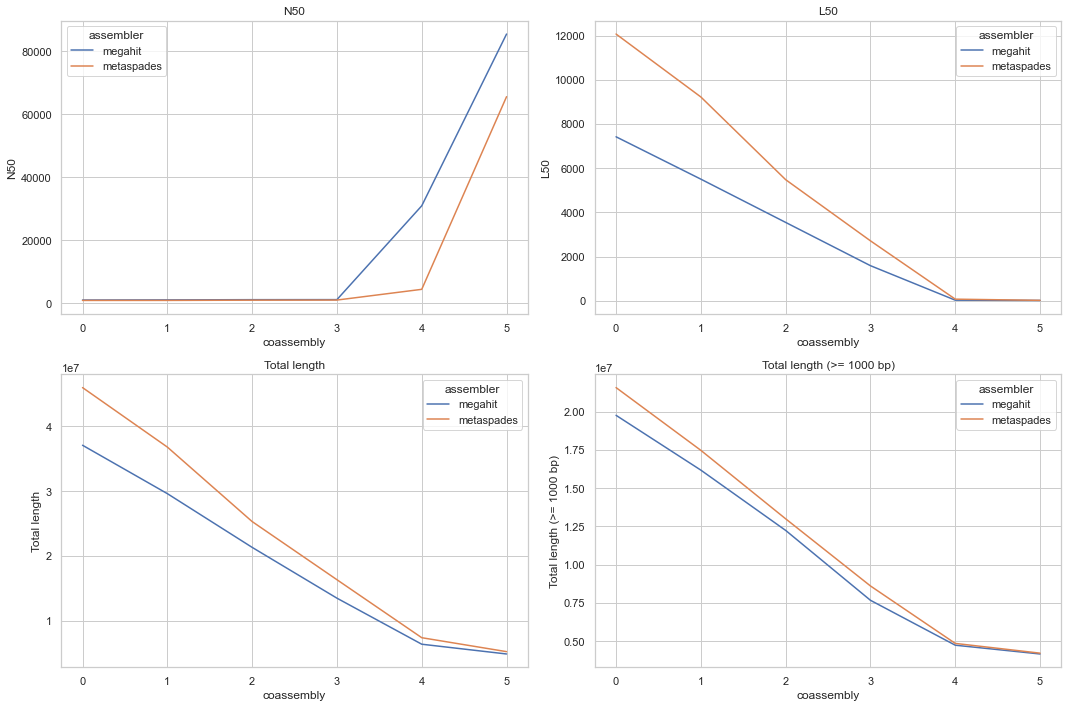

In [5]:

sns.set(style='whitegrid')

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust the figsize as needed

sns.lineplot(data=report_DF, x='coassembly', y='N50', hue='assembler', ax=axs[0, 0])
axs[0, 0].set_title('N50')

sns.lineplot(data=report_DF, x='coassembly', y='L50', hue='assembler', ax=axs[0, 1])
axs[0, 1].set_title('L50')

sns.lineplot(data=report_DF, x='coassembly', y='Total length', hue='assembler', ax=axs[1, 0])
axs[1, 0].set_title('Total length')

sns.lineplot(data=report_DF, x='coassembly', y='Total length (>= 1000 bp)', hue='assembler', ax=axs[1, 1])
axs[1, 1].set_title('Total length (>= 1000 bp)')

plt.tight_layout()

plt.show()


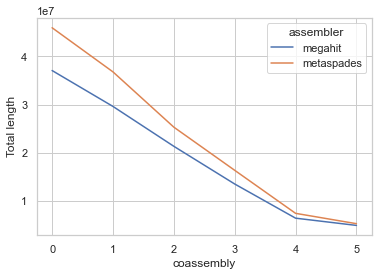

In [4]:
sns.lineplot(data=report_DF,x='coassembly',y='Total length',hue='assembler');

In [ ]:
#allign to viral genbank - blast the contigs against Will's viral genebank file (want a global contig, local for ref db)
#kraken approach - may not be specific enough 